In [55]:
import torch
from pytorch_vqvae.modules import VectorQuantizedVAE
from torchvision import transforms, datasets

In [4]:
num_channels=3
hidden_size=64
k=64
pad=1

In [5]:
model = VectorQuantizedVAE(num_channels, hidden_size,k, pad)

In [6]:
model.load_state_dict(torch.load("vqvae_mini.pt", map_location="cpu"))

<All keys matched successfully>

In [10]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [13]:
from pytorch_vqvae.datasets import MiniImagenet
dataset = MiniImagenet("data/temp/miniimagenet", valid=True,
                             download=True, transform=transform)

In [17]:
loader = torch.utils.data.DataLoader(dataset,
                                       batch_size=8, shuffle=False, drop_last=True,
                                       num_workers=0, pin_memory=True)

In [28]:
batch=next(iter(loader))[0]

In [29]:
batch.size()

torch.Size([8, 3, 128, 128])

In [33]:
def generate_reconstructions(images, model):
    with torch.no_grad():
        x_tilde, _, _ = model(images)
    return x_tilde

In [34]:
reconstructions=generate_reconstructions(batch, model )

In [35]:
reconstructions.size()

torch.Size([8, 3, 128, 128])

In [37]:
import torchvision
import matplotlib.pyplot as plt

In [47]:
grid_rec = torchvision.utils.make_grid(reconstructions, nrow=4, normalize=True)
grid_orig = torchvision.utils.make_grid(batch, nrow=4, normalize=True)

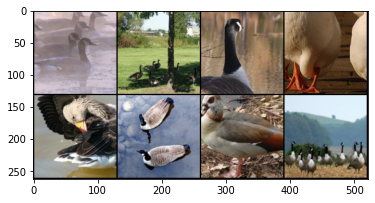

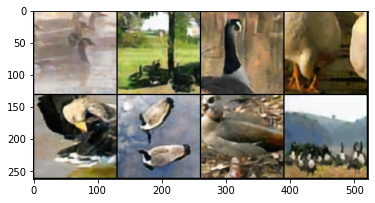

In [49]:
plt.imshow(grid_orig.permute(1, 2, 0))

plt.show()

plt.imshow(grid_rec.permute(1, 2, 0))



In [51]:
model.encode(batch).size()

torch.Size([8, 32, 32])